# <font color='red'> Linear Models - regression, logistic regression : Supervised learning
https://scikit-learn.org/stable/modules/linear_model.html#ordinary-least-squares

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings(action='ignore')
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

## 단순 회귀 생성(Simple Linear Regression)

A straight-line fit to data. A straight-line fit is a model of the form
$$
y = ax + b
$$
where $a$ is commonly known as the *slope*, and $b$ is commonly known as the *intercept*.

Consider the following data, which is scattered about a line with a slope of 2 and an intercept of -5:

In [2]:
from sklearn.linear_model import LinearRegression
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = 2 * x - 5 + rng.randn(50)

model = LinearRegression(fit_intercept=True)
yfit = model.fit(x[:, np.newaxis], y).predict(x.reshape(-1,1))

In [3]:
from sklearn.metrics import mean_squared_error
print(f'Model intercept: {model.intercept_}')
print(f'Coefficients: {model.coef_}')
print(f'Mean squared error: {mean_squared_error(y, yfit)}')

Model intercept: -4.998577085553202
Coefficients: [2.02720881]
Mean squared error: 0.818338857026618


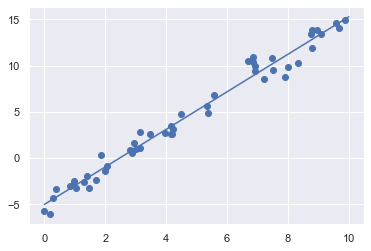

In [4]:
xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])
plt.scatter(x, y)
plt.plot(xfit, yfit);

## 다중 회귀 생성(Multiple Linear Regression)

The ``LinearRegression`` estimator is much more capable than this, however—in addition to simple straight-line fits, it can also handle multidimensional linear models of the form
$$
y = a_0 + a_1 x_1 + a_2 x_2 + \cdots
$$
where there are multiple $x$ values.

In [5]:
rng = np.random.RandomState(1)
X = 10 * rng.rand(1000, 3)
y = 0.5 + np.dot(X, [1.5, -2., 1.])

model.fit(X, y)
print(model.intercept_)
print(model.coef_)

LinearRegression()

0.499999999999968
[ 1.5 -2.   1. ]


## 로지스틱 회귀분석(Logistic Regression)

### statsmodels.api

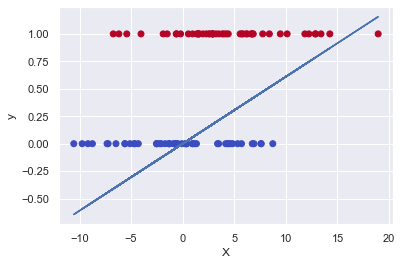

In [6]:
from sklearn.datasets import make_blobs
import statsmodels.api as sm
X, y = make_blobs(100, 1, centers=2, random_state=14, cluster_std=5)
y_predict = sm.OLS(y, X).fit().predict(X)
plt.scatter(X[:, 0], y, c=y, cmap='coolwarm')
plt.plot(X, y_predict); plt.ylabel('y'); plt.xlabel('X'); 

Optimization terminated successfully.
         Current function value: 0.601782
         Iterations 5


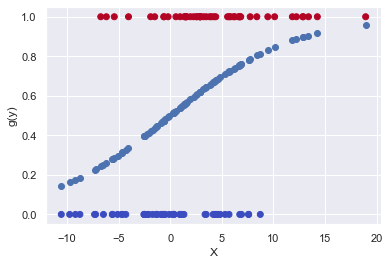

In [7]:
y_predict = sm.Logit(y, X).fit().predict(X) 
plt.scatter(X[:, 0], y, c=y, cmap='coolwarm')
plt.scatter(X, y_predict); plt.ylabel('g(y)'); plt.xlabel('X'); 

## scikit-learn API

In [8]:
rng = np.random.RandomState(1234)
X = 10 * rng.rand(100); X.shape
y = np.cos(X) + 0.25 * rng.randn(100)
X = X.reshape(-1,1); X.shape # X = X[:,np.newaxis] 

(100,)

(100, 1)

In [9]:
from sklearn.linear_model import LinearRegression
y_predict = LinearRegression().fit(X,y).predict(X)

In [10]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
poly_model = make_pipeline(PolynomialFeatures(20), LinearRegression())
poly_model.fit(X, y)
Xfit = np.linspace(0, 10, 100)
yfit = poly_model.predict(Xfit[:,np.newaxis])

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=20)),
                ('linearregression', LinearRegression())])

<Figure size 1440x360 with 0 Axes>

(-4.0, 4.0)

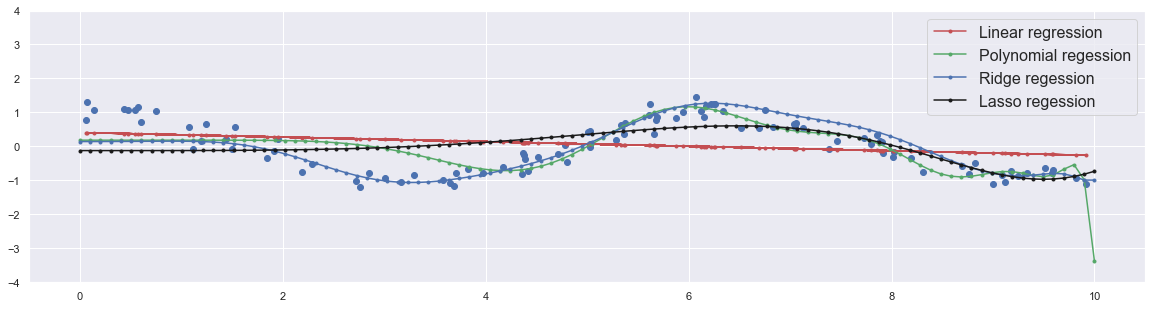

In [11]:
from sklearn.linear_model import Ridge, Lasso
lasso_model = make_pipeline(PolynomialFeatures(20), Lasso(alpha= 1))
predict_lasso = lasso_model.fit(X, y).predict(Xfit[:,np.newaxis])

ridge_model = make_pipeline(PolynomialFeatures(20), Ridge(alpha= 30))
predict_ridge = ridge_model.fit(X, y).predict(Xfit[:,np.newaxis])

plt.figure(figsize=(20, 5)); plt.rc('legend', fontsize=16)
plt.scatter(X, y)
plt.plot(X, y_predict, 'r.-', label='Linear regression'); plt.legend()
plt.plot(Xfit, yfit, 'g.-', label='Polynomial regession'); plt.legend()
plt.plot(Xfit, predict_ridge, 'b.-', label='Ridge regession'); plt.legend()
plt.plot(Xfit, predict_lasso, 'k.-', label='Lasso regession'); plt.legend()
plt.ylim(-4, 4)

## Basis Function Regression

- One trick you can use to adapt linear regression to nonlinear relationships between variables is to transform the data according to *basis functions*.
$$
y = a_0 + a_1 x_1 + a_2 x_2 + a_3 x_3 + \cdots
$$
and build the $x_1, x_2, x_3,$ and so on, from our single-dimensional input $x$.
That is, we let $x_n = f_n(x)$, where $f_n()$ is some function that transforms our data.

For example, if $f_n(x) = x^n$, our model becomes a polynomial regression:
$$
y = a_0 + a_1 x + a_2 x^2 + a_3 x^3 + \cdots
$$
Notice that this is *still a linear model*—the linearity refers to the fact that the coefficients $a_n$ never multiply or divide each other.
What we have effectively done is taken our one-dimensional $x$ values and projected them into a higher dimension, so that a linear fit can fit more complicated relationships between $x$ and $y$.

## Regularization(Lasso, Ridge)    (L1, L2)

##  Digits Classification Exercise

In [12]:
from sklearn.datasets import load_digits
data = load_digits()

df = pd.DataFrame(data.data, columns=data.feature_names)
df['label'] = data.target
df['label'] = df['label'].apply(lambda x: 0 if x != 1 else x)
df

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,label
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,0


In [13]:
df.isnull().sum().sum()

0

<AxesSubplot:>

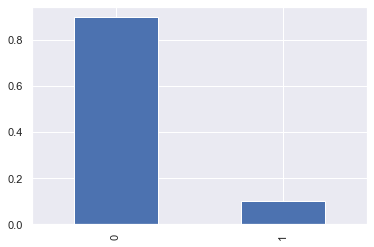

In [14]:
df['label'].value_counts(normalize=True).plot(kind='bar')

In [15]:
X = df.drop('label', axis=1)
X = X/X.max() # 표준화
y = df['label']

In [16]:
X.fillna(0, inplace=True)

In [17]:
# 모델 선택
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, 
                                                  stratify= y, random_state=11)
X_train.shape, X_test.shape
y_train.shape, y_test.shape

((1437, 64), (360, 64))

((1437,), (360,))

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, RandomizedSearchCV
np.random.seed(1357)
kf = KFold(n_splits=3)
model = LogisticRegression(solver='saga', random_state=11)

In [19]:
params = {'C': np.logspace(-4, 4, 20), 'penalty': ['l1', 'l2']}
grid = RandomizedSearchCV(model, param_distributions=params, cv=kf,
                          scoring = 'recall_macro')
grid.fit(X_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=3, random_state=None, shuffle=False),
                   estimator=LogisticRegression(random_state=11, solver='saga'),
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'penalty': ['l1', 'l2']},
                   scoring='recall_macro')

In [20]:
print('optimal train score: {:.3f}'.format(grid.best_score_))
print('test score: {:.3f}'.format(grid.score(X_test, y_test)))
print('optimal parameter: {}'.format(grid.best_params_))

optimal train score: 0.956
test score: 0.981
optimal parameter: {'penalty': 'l2', 'C': 78.47599703514607}


In [21]:
best_params = grid.best_params_
tuned_params = {item[:]: best_params[item] for item in best_params}
model= LogisticRegression(random_state=11, solver='saga').set_params(**tuned_params)
model.get_params()

{'C': 78.47599703514607,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 11,
 'solver': 'saga',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [22]:
model.fit(X_train, y_train)
model.coef_
model.intercept_

LogisticRegression(C=78.47599703514607, random_state=11, solver='saga')

array([[ 0.00000000e+00, -7.05000941e-01,  3.12713246e-01,
         1.08606253e+00, -6.62128953e+00,  5.54362941e+00,
        -2.83382806e+00, -2.84934022e-01, -1.17167053e-01,
        -6.64497237e+00, -3.31768997e+00, -2.89819778e+00,
         1.80429055e+00,  1.81868832e+00, -4.24879709e+00,
        -1.48291027e-01,  3.10227038e+00,  1.71628000e+00,
         1.21278149e+00,  7.96492839e+00,  4.50964890e+00,
        -2.20441070e+00,  9.37700028e-01, -1.47064204e-01,
         5.27386875e-01, -2.51363988e-01, -5.16921304e-01,
         2.51063272e+00,  1.23602864e+00,  2.00125953e+00,
        -2.22044683e+00, -1.44961167e-02,  0.00000000e+00,
        -1.43457142e+00,  8.35657236e-01, -1.22859905e+00,
         8.80611525e-01, -6.84646552e-01, -3.16131422e+00,
         0.00000000e+00, -9.01984182e-02, -4.53185462e+00,
        -9.29515511e-01,  7.59914099e-01,  3.06571240e-01,
        -2.50757735e+00, -2.91067551e+00, -4.95851455e-02,
        -1.36611452e-03, -1.43646456e+00, -9.45107399e-0

array([-10.89740031])

### 코드가 길면 ()

<AxesSubplot:xlabel='variable'>

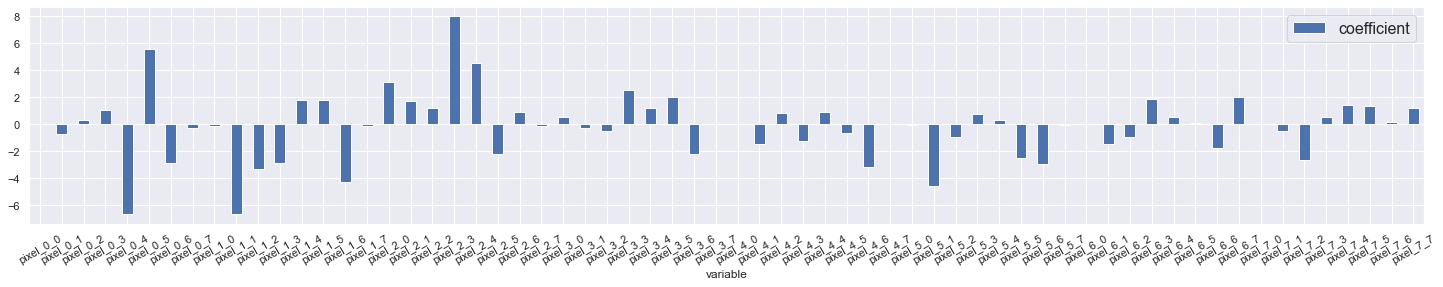

In [23]:
data = zip(X_train.columns, np.squeeze(model.coef_))
(pd.DataFrame(data, columns =['variable', 'coefficient']).set_index('variable').
plot.bar(rot='30', figsize=(25,4)))

In [24]:
from sklearn.metrics import plot_confusion_matrix, classification_report
y_predict = model.predict(X_test)
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       324
           1       0.92      0.97      0.95        36

    accuracy                           0.99       360
   macro avg       0.96      0.98      0.97       360
weighted avg       0.99      0.99      0.99       360



(array([310.,   5.,   3.,   2.,   2.,   2.,   1.,   4.,   7.,  24.]),
 array([3.68894311e-12, 9.99719028e-02, 1.99943806e-01, 2.99915708e-01,
        3.99887611e-01, 4.99859514e-01, 5.99831417e-01, 6.99803320e-01,
        7.99775222e-01, 8.99747125e-01, 9.99719028e-01]),
 <BarContainer object of 10 artists>)

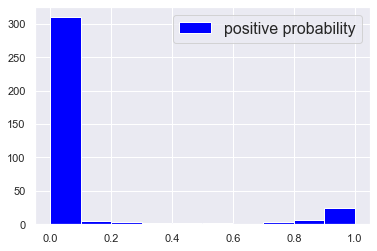

(array([ 24.,   7.,   4.,   1.,   2.,   2.,   2.,   3.,   5., 310.]),
 array([2.80971916e-04, 1.00252875e-01, 2.00224778e-01, 3.00196680e-01,
        4.00168583e-01, 5.00140486e-01, 6.00112389e-01, 7.00084292e-01,
        8.00056194e-01, 9.00028097e-01, 1.00000000e+00]),
 <BarContainer object of 10 artists>)

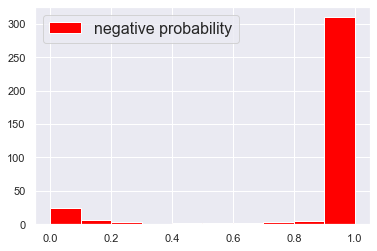

In [25]:
y_proba = model.predict_proba(X_test)
plt.hist(y_proba[:, 1], color ='blue', label='positive probability'); plt.legend(); plt.show()
plt.hist(y_proba[:, 0], color ='red', label='negative probability'); plt.legend()

<AxesSubplot:title={'center':'Learning Curve'}, xlabel='Training examples', ylabel='Score'>

<AxesSubplot:title={'center':'Learning Curve'}, xlabel='Training examples', ylabel='Score'>

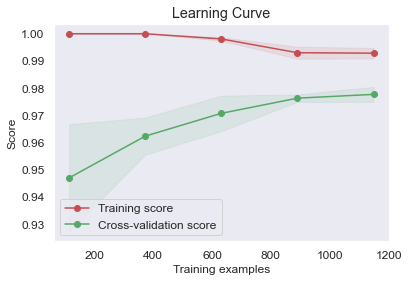

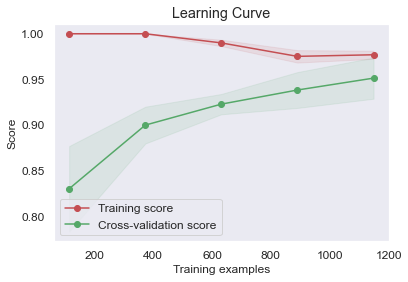

In [26]:
import scikitplot as skplt
skplt.estimators.plot_learning_curve(model, X_train, y_train, scoring='accuracy')
skplt.estimators.plot_learning_curve(model, X_train, y_train, scoring='recall_macro')

# End